# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



# 개별 분석

### 1) Attrition

In [3]:
# Attrition
data['Attrition'].value_counts()

Attrition
0    405
1    195
Name: count, dtype: int64

In [4]:
data['Attrition'].value_counts(normalize=True)

Attrition
0    0.675
1    0.325
Name: proportion, dtype: float64

<Axes: xlabel='Attrition', ylabel='count'>

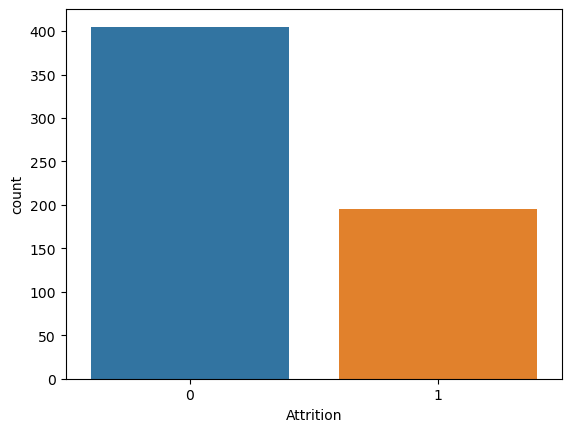

In [7]:
# 시각화, bar 형(count)
sns.countplot(x='Attrition', data = data)

### 2) OverTime

OverTime
No     405
Yes    195
Name: count, dtype: int64


<Axes: xlabel='OverTime', ylabel='count'>

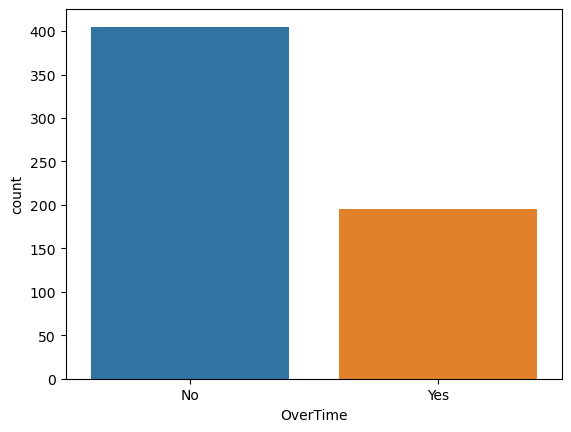

In [9]:
print(data['OverTime'].value_counts())
sns.countplot(x='OverTime', data=data)

### 3) PercentSalaryHike

In [13]:
data.columns

AttributeError: 'Index' object has no attribute 'index'

## **2.범주-->범주**

In [17]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [18]:
feature = 'Gender'

* 교차표

In [19]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [20]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

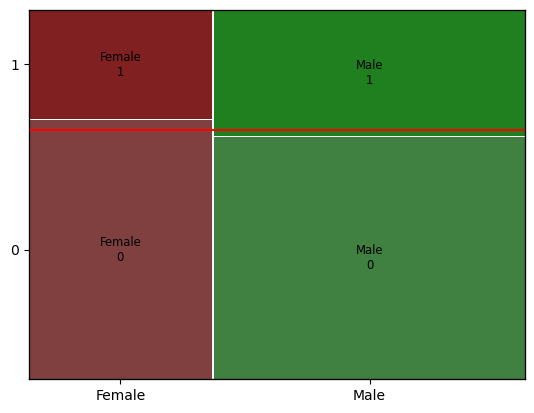

In [21]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [22]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

* 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.
* 남녀간 비슷해보이지만, 이직이라는 행위 자체가 높은 비율로 일어나지 않는 상황이기 때문에, 차이가 작다고 무시할 수는 없다.

* 여성중 이직 비율과 남성중 이직 비율 사이의 비율을 계산해서 분석하는 것도 방법이다 

### **(2) JobSatisfaction --> Attrition**

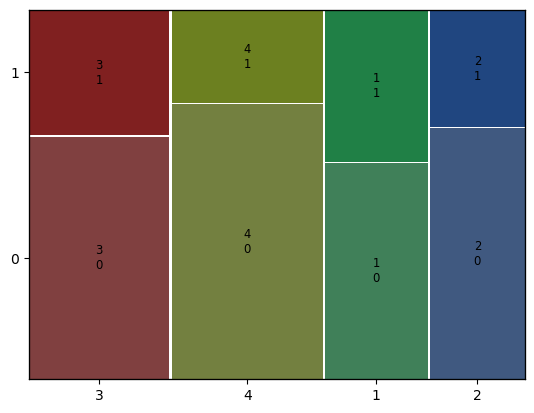

In [41]:
mosaic(data, ['JobSatisfaction', 'Attrition'])
plt.show()

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

### **(3) MaritalStatus --> Attrition**

In [23]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     274
Single      214
Divorced    112
Name: count, dtype: int64

In [30]:
# 범주 -> 범주, 교차표
table = pd.crosstab(data['MaritalStatus'], data['Attrition'])
table

Attrition,0,1
MaritalStatus,,
Divorced,89,23
Married,205,69
Single,111,103


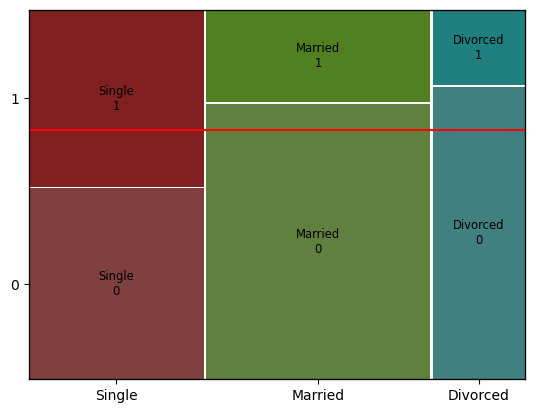

In [28]:
# 시각화, mosaic
mosaic(data, ['MaritalStatus', 'Attrition'])
plt.axhline(1- data['Attrition'].mean(), color='r')
plt.show()

* Single > married > Divorced 순서로 이직률이 높다 

In [31]:
# 수치화, 카이제곱검정 -> 기대빈도 분에 관측 빈도
# 기대빈도는 결혼상황과 관계없이 이직률이 전체 이직률 평균과 동일해야한다.
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=37.82971190707053, pvalue=6.100738829354204e-09, dof=2, expected_freq=array([[ 75.6 ,  36.4 ],
       [184.95,  89.05],
       [144.45,  69.55]]))

* 자유도가 2이다. 따라서 통계량은 4 이상일 때 차이가 있다고 판단한다. (p-value < 0.05 일 때)

* 파악된 내용을 기술해 봅시다.

In [36]:
# 함수화
def eda_2_cc(var, target, data):
    # 두 변수의 count
    print(f'{var}의 빈도 : {data[[var]].value_counts()}')
    print(f'{target}의 빈도 : {data[target].value_counts()}')
    
    # table화
    table = pd.crosstab(data[var], data[target])
    
    # 시각화, mosaic
    mosaic(data, [var, target])
    plt.axhline(1- data[target].mean(), color='r')
    plt.show()
    # 수치화, 카이제곱검정(빈도비교)
    print(spst.chi2_contingency(table))
    

### **(4) OverTime --> Attrition**

OverTime의 빈도 : OverTime
No          405
Yes         195
Name: count, dtype: int64
Attrition의 빈도 : Attrition
0    405
1    195
Name: count, dtype: int64


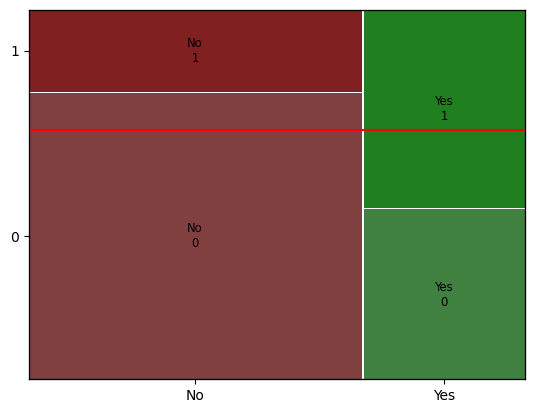

Chi2ContingencyResult(statistic=58.57149427899665, pvalue=1.9603625783060702e-14, dof=1, expected_freq=array([[273.375, 131.625],
       [131.625,  63.375]]))


In [42]:
eda_2_cc('OverTime', 'Attrition', data)

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [43]:
feature = 'Age'

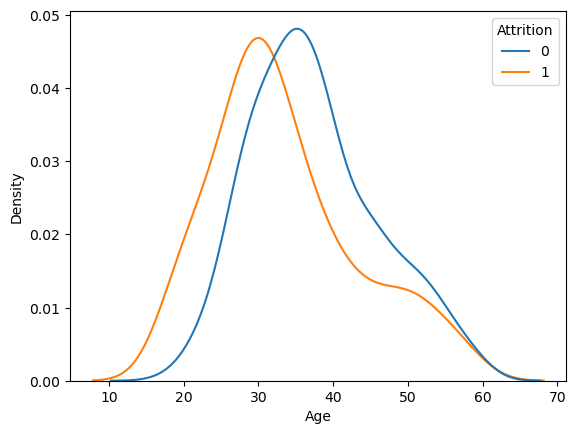

In [44]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

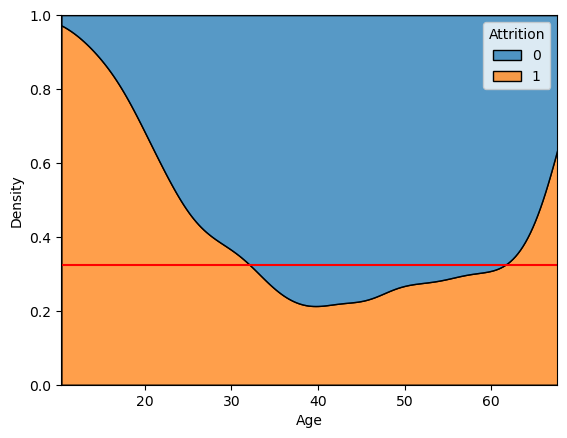

In [45]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

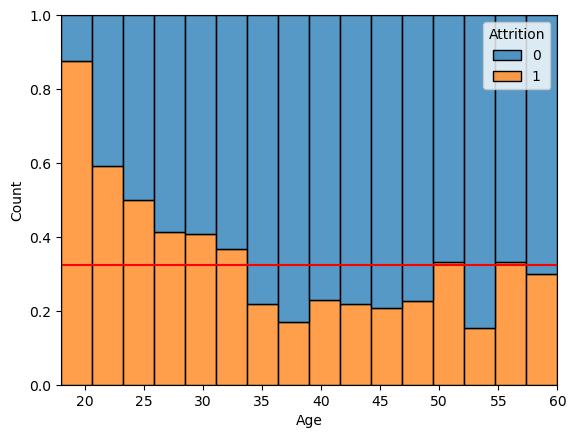

In [47]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill', bins=16)
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

In [51]:
data.loc[data['Age']>50, 'Attrition'].value_counts()

Attrition
0    37
1    15
Name: count, dtype: int64

### **(2) DistanceFromHome --> Attrition**

In [69]:
def eda_2_nc(var, target, data):
    # 시각화, histplot, kdeplot
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.kdeplot(x= var, data= data, hue = target, common_norm=False)
    plt.grid()
    
    plt.subplot(1,3,2)
    sns.kdeplot(x=var, data=data, hue=target, multiple='fill')
    plt.axhline(data[target].mean(), color='r')
    plt.grid()
    
    plt.subplot(1,3,3)
    sns.histplot(x=var, data=data, hue = target, multiple='fill')
    plt.axhline(data[target].mean(), color='r')
    plt.show()
    
    # 수치화, 없음

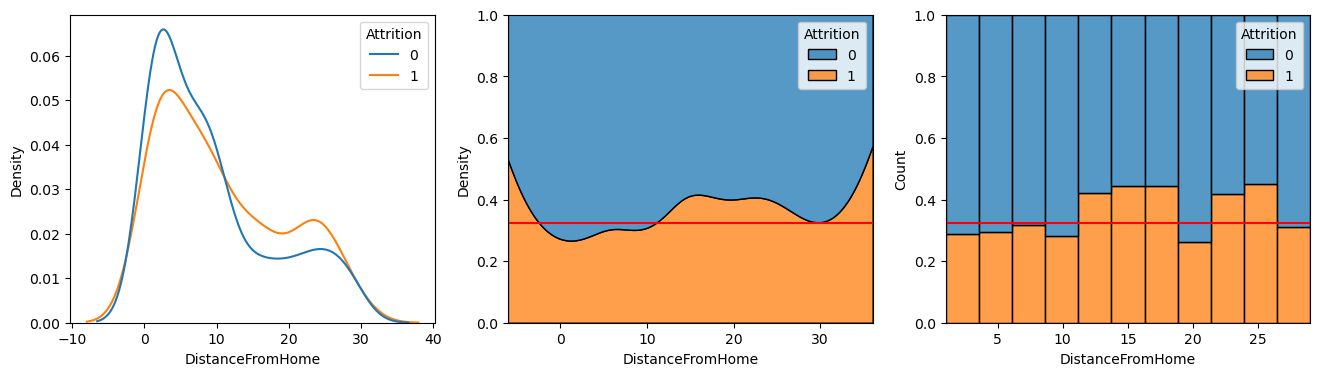

In [70]:
var='DistanceFromHome'
target='Attrition'
eda_2_nc(var,target,data)

* 파악된 내용을 기술해 봅시다.

### **(3) MonthlyIncome --> Attrition**

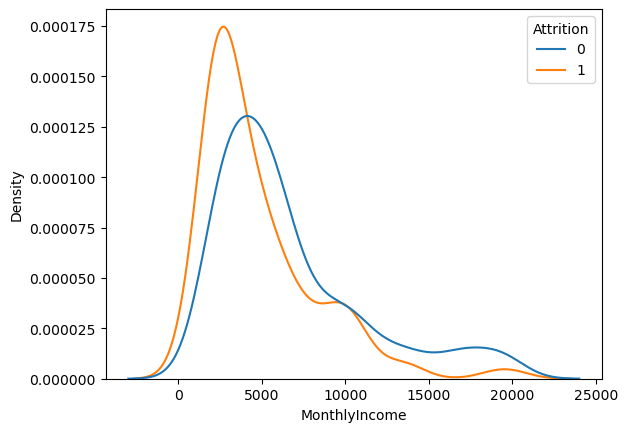

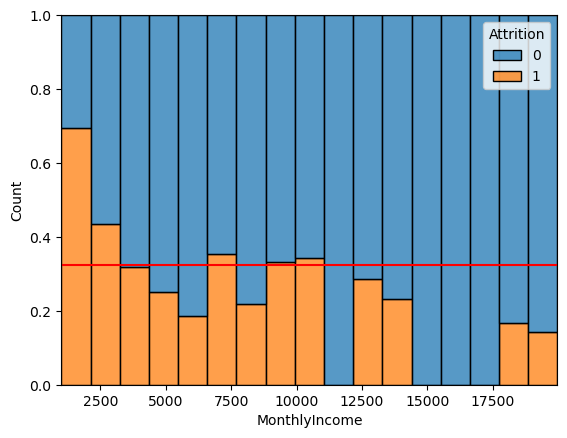

In [60]:
var = 'MonthlyIncome'
eda_2_nc(var,target,data)

* 파악된 내용을 기술해 봅시다.

### **(4) PercentSalaryHike --> Attrition**

* 파악된 내용을 기술해 봅시다.

### **(5) TotalWorkingYears --> Attrition**

* 파악된 내용을 기술해 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음(약한 관계)

In [71]:
# test
boston = pd.read_csv('https://bit.ly/3PArw4W')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [72]:
# tax -> medv , 수치형 -> 집값(수치형)
import scipy.stats as spst

spst.pearsonr(boston['tax'], boston['medv'])

PearsonRResult(statistic=-0.4685359335677671, pvalue=5.637733627690444e-29)